# SPE ML Challenge

## Team BlueDigital



In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
# Machine learning basics
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE, r2_score, mean_absolute_percentage_error as MAPE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

In [57]:
# Load temperature data into a pandas dataframe
#df_temp = pd.read_excel('../data/illinois_basing_train.xlsx', sheet_name='illinois_basing_train')
df = pd.read_csv('C:\SPE_ML_APRIL2023\ml-challenge-2023\data\illinois_basing_train.csv')
df.head()
df_t = pd.read_csv('C:\SPE_ML_APRIL2023\ml-challenge-2023\data\illinois_basing_test_04112023.csv')

In [58]:
df = df.drop(columns=['Avg_PLT_CO2InjRate_TPH','Avg_VW1_ANPs_psi', 'Avg_CCS1_DH6325Ps_psi'])
df_t= df_t.drop(columns=[ 'Avg_VW1_ANPs_psi', 'Avg_CCS1_DH6325Ps_psi'])

In [59]:
df['SampleTimeUTC'] = pd.to_datetime(df['SampleTimeUTC'], format='%d/%m/%Y %H:%M')
df.set_index('SampleTimeUTC', inplace=True)
df_t['SampleTimeUTC'] = pd.to_datetime(df_t['SampleTimeUTC'], format='%m/%d/%Y %H:%M')
df_t.set_index('SampleTimeUTC', inplace=True)

In [60]:
df.columns

Index(['Avg_PLT_CO2VentRate_TPH', 'Avg_CCS1_WHCO2InjPs_psi',
       'Avg_CCS1_WHCO2InjTp_F', 'Avg_CCS1_ANPs_psi', 'Avg_CCS1_DH6325Tp_F',
       'Avg_VW1_WBTbgPs_psi', 'Avg_VW1_WBTbgTp_F', 'Avg_VW1_Z11D4917Ps_psi',
       'Avg_VW1_Z11D4917Tp_F', 'Avg_VW1_Z10D5001Ps_psi',
       'Avg_VW1_Z10D5001Tp_F', 'Avg_VW1_Z09D5653Ps_psi',
       'Avg_VW1_Z09D5653Tp_F', 'Avg_VW1_Z08D5840Ps_psi',
       'Avg_VW1_Z08D5840Tp_F', 'Avg_VW1_Z07D6416Ps_psi',
       'Avg_VW1_Z07D6416Tp_F', 'Avg_VW1_Z06D6632Ps_psi',
       'Avg_VW1_Z06D6632Tp_F', 'Avg_VW1_Z05D6720Ps_psi',
       'Avg_VW1_Z05D6720Tp_F', 'Avg_VW1_Z04D6837Ps_psi',
       'Avg_VW1_Z04D6837Tp_F', 'Avg_VW1_Z03D6945Ps_psi',
       'Avg_VW1_Z03D6945Tp_F', 'Avg_VW1_Z02D6982Ps_psi',
       'Avg_VW1_Z02D6982Tp_F', 'Avg_VW1_Z01D7061Ps_psi',
       'Avg_VW1_Z01D7061Tp_F', 'Avg_VW1_Z0910D5482Ps_psi',
       'Avg_VW1_Z0910D5482Tp_F', 'inj_diff'],
      dtype='object')

In [61]:
df['ventRate_diff']=df['Avg_PLT_CO2VentRate_TPH'].diff()
df_t['ventRate_diff']=df_t['Avg_PLT_CO2VentRate_TPH'].diff()

In [62]:
df_sub = df[['Avg_PLT_CO2VentRate_TPH','Avg_CCS1_WHCO2InjPs_psi', 'Avg_CCS1_WHCO2InjTp_F',  'Avg_CCS1_DH6325Tp_F',
        'Avg_VW1_WBTbgTp_F','ventRate_diff','inj_diff']]

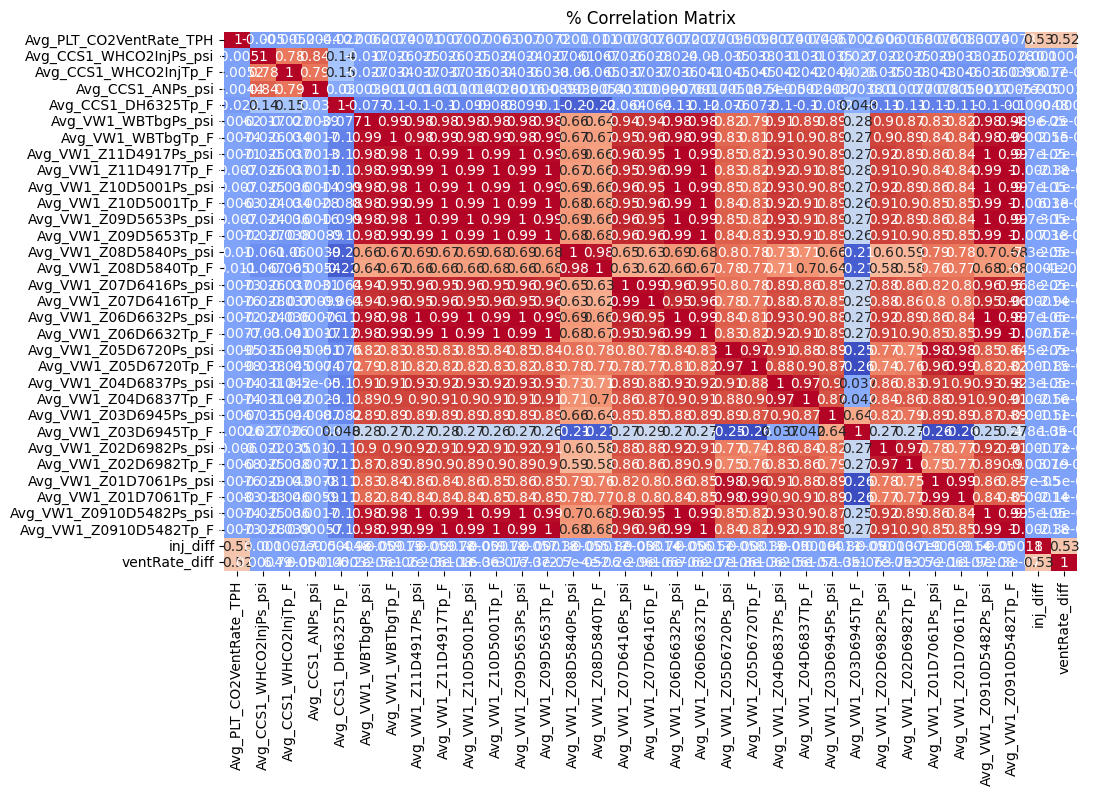

Avg_PLT_CO2VentRate_TPH  Avg_PLT_CO2VentRate_TPH    1.000000
Avg_VW1_Z06D6632Ps_psi   Avg_VW1_Z06D6632Ps_psi     1.000000
Avg_CCS1_ANPs_psi        Avg_CCS1_ANPs_psi          1.000000
Avg_CCS1_DH6325Tp_F      Avg_CCS1_DH6325Tp_F        1.000000
Avg_VW1_WBTbgPs_psi      Avg_VW1_WBTbgPs_psi        1.000000
                                                      ...   
Avg_VW1_Z01D7061Ps_psi   Avg_VW1_Z03D6945Tp_F      -0.255334
Avg_VW1_Z03D6945Tp_F     Avg_VW1_Z05D6720Tp_F      -0.259161
Avg_VW1_Z05D6720Tp_F     Avg_VW1_Z03D6945Tp_F      -0.259161
Avg_VW1_Z01D7061Tp_F     Avg_VW1_Z03D6945Tp_F      -0.262623
Avg_VW1_Z03D6945Tp_F     Avg_VW1_Z01D7061Tp_F      -0.262623
Length: 1089, dtype: float64

In [63]:
df_correlation =  df.corr()
import seaborn as sns
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False, annot=True, data=df_correlation, cmap='coolwarm')
plt.title('% Correlation Matrix')
plt.show()
corr_series = df_correlation.unstack()

# Sort the correlations
corr_ranking = corr_series.sort_values(ascending=False)
corr_ranking

### Corr Matrix

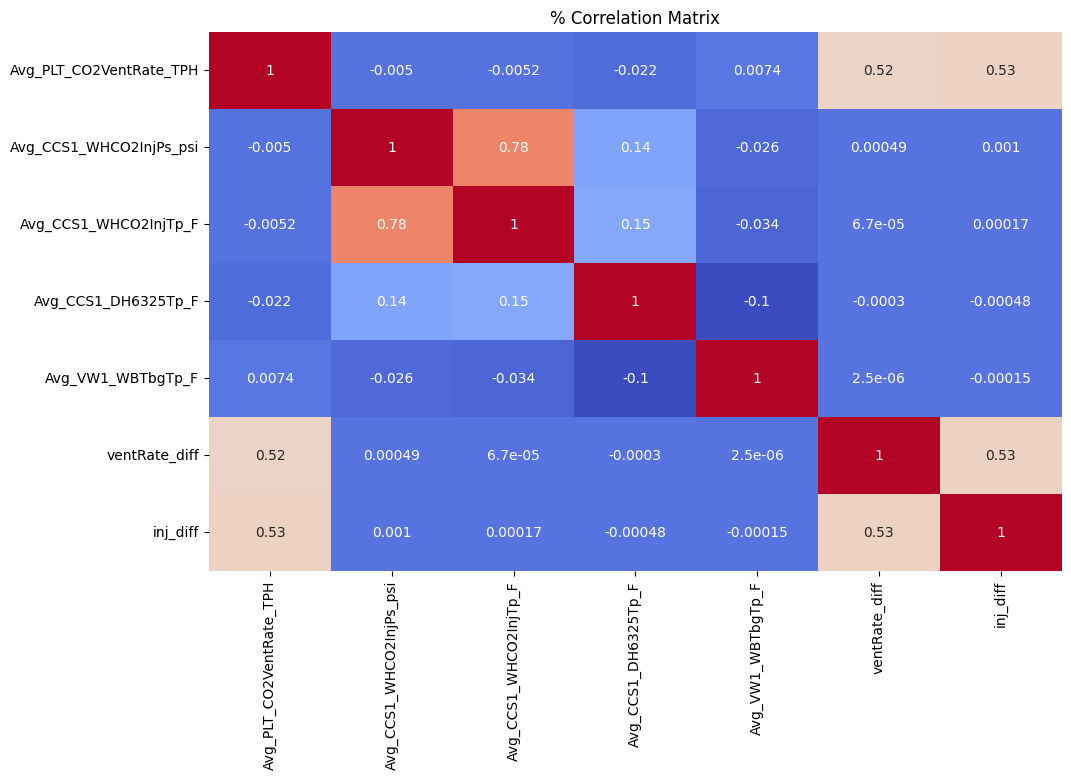

In [64]:
df_correlation2 =  df_sub.corr()
import seaborn as sns
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False, annot=True, data=df_correlation2, cmap='coolwarm')
plt.title('% Correlation Matrix')
plt.show()
corr_series = df_correlation2.unstack()


### Outlier Removal

In [65]:
#Removal Based on mean/std
# Compute the mean and standard deviation of column A
mean = df['Avg_CCS1_WHCO2InjPs_psi'].mean()
std = df['Avg_CCS1_WHCO2InjPs_psi'].std()

# Remove rows where column A value is greater than mean + 3*std
df = df[~(df['Avg_CCS1_WHCO2InjPs_psi'] > mean + 3*std)]

# Compute the mean and standard deviation of column A
mean = df['inj_diff'].mean()
std = df['inj_diff'].std()

# Remove rows where column A value is greater than mean + 3*std
df = df[~(df['inj_diff'] > mean + 4*std)]

# Show the resulting DataFrame
print(df)


                     Avg_PLT_CO2VentRate_TPH  Avg_CCS1_WHCO2InjPs_psi  \
SampleTimeUTC                                                           
2009-10-01 00:00:00                20.543221                 1.880208   
2009-10-01 01:00:00                20.543221                 1.374349   
2009-10-01 02:00:00                20.543221                 1.315104   
2009-10-01 03:00:00                20.543221                 1.255859   
2009-10-01 04:00:00                20.543221                 1.342448   
...                                      ...                      ...   
2012-11-18 03:00:00                 0.408333              1409.701282   
2012-11-18 04:00:00                 0.458333              1409.036129   
2012-11-18 05:00:00                 0.508333              1408.648841   
2012-11-18 06:00:00                 0.504202              1406.788722   
2012-11-18 07:00:00                 0.616667              1407.204333   

                     Avg_CCS1_WHCO2InjTp_F  Avg_CC

In [66]:
def remove_outliers_iqr(arr, multiplier=1.5):
    q3 = np.nanpercentile(arr, 75)
    q1 = np.nanpercentile(arr, 25)
    iqr = q3 - q1
    lower_bound = q1-multiplier*iqr
    upper_bound = q3 + multiplier*iqr
    return  arr[(arr>lower_bound) & (arr<upper_bound)]

(27371, 33)


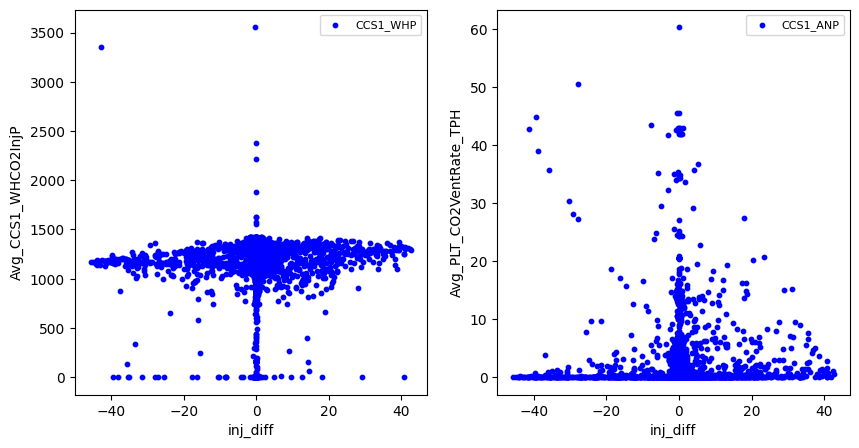

In [67]:
df = remove_outliers_iqr(df, 1.5)
df.shape
#df = remove_outliers_iqr(df, 0.8)
print(df.shape)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(df['inj_diff'], df['Avg_CCS1_WHCO2InjPs_psi'], color='blue', label='CCS1_WHP', s=10)
axs[0].set_xlabel('inj_diff')
axs[0].set_ylabel('Avg_CCS1_WHCO2InjP')
axs[0].legend(loc='upper right', fontsize=8)


axs[1].scatter(df['inj_diff'], df['Avg_PLT_CO2VentRate_TPH'], color='blue', label='CCS1_ANP', s=10)
axs[1].set_xlabel('inj_diff')
axs[1].set_ylabel('Avg_PLT_CO2VentRate_TPH')
axs[1].legend(loc='upper right', fontsize=8)
plt.show()

In [68]:
df['inj_diff'].describe()

count    27369.000000
mean         0.004127
std          3.763825
min        -45.671875
25%         -0.072918
50%          0.000000
75%          0.074306
max         42.592708
Name: inj_diff, dtype: float64

In [69]:
df.shape

(27371, 33)

In [70]:

# Get all the columns from the dataframe for the training data.
columnsFeat_old = df.columns[[0, 1, 2,3,4, -1]]  
columnsFeat = df.columns[[0, 1, 2, -1]]
columnsTarget = df.columns[-2] 
columnsFeat 

Index(['Avg_PLT_CO2VentRate_TPH', 'Avg_CCS1_WHCO2InjPs_psi',
       'Avg_CCS1_WHCO2InjTp_F', 'ventRate_diff'],
      dtype='object')

In [71]:
na_counts = df.isna().sum()
na_counts 

Avg_PLT_CO2VentRate_TPH        0
Avg_CCS1_WHCO2InjPs_psi      128
Avg_CCS1_WHCO2InjTp_F          0
Avg_CCS1_ANPs_psi             97
Avg_CCS1_DH6325Tp_F            0
Avg_VW1_WBTbgPs_psi         1270
Avg_VW1_WBTbgTp_F           1336
Avg_VW1_Z11D4917Ps_psi       709
Avg_VW1_Z11D4917Tp_F         688
Avg_VW1_Z10D5001Ps_psi       709
Avg_VW1_Z10D5001Tp_F         688
Avg_VW1_Z09D5653Ps_psi       709
Avg_VW1_Z09D5653Tp_F         688
Avg_VW1_Z08D5840Ps_psi      1206
Avg_VW1_Z08D5840Tp_F        1517
Avg_VW1_Z07D6416Ps_psi      1412
Avg_VW1_Z07D6416Tp_F        1412
Avg_VW1_Z06D6632Ps_psi      1897
Avg_VW1_Z06D6632Tp_F        1897
Avg_VW1_Z05D6720Ps_psi      3440
Avg_VW1_Z05D6720Tp_F        3440
Avg_VW1_Z04D6837Ps_psi       795
Avg_VW1_Z04D6837Tp_F         795
Avg_VW1_Z03D6945Ps_psi      3034
Avg_VW1_Z03D6945Tp_F        1465
Avg_VW1_Z02D6982Ps_psi       974
Avg_VW1_Z02D6982Tp_F         974
Avg_VW1_Z01D7061Ps_psi      2088
Avg_VW1_Z01D7061Tp_F        2287
Avg_VW1_Z0910D5482Ps_psi     688
Avg_VW1_Z0

In [72]:
na_counts = df[columnsTarget].isna().sum()
na_counts 

2

In [73]:
df.dropna(inplace=True)

In [74]:
df_t.fillna(0, inplace=True)
na_counts = df_t[columnsFeat].isna().sum()
na_counts 

Avg_PLT_CO2VentRate_TPH    0
Avg_CCS1_WHCO2InjPs_psi    0
Avg_CCS1_WHCO2InjTp_F      0
ventRate_diff              0
dtype: int64

In [75]:

na_counts = df[columnsFeat].isna().sum()
na_counts 

Avg_PLT_CO2VentRate_TPH    0
Avg_CCS1_WHCO2InjPs_psi    0
Avg_CCS1_WHCO2InjTp_F      0
ventRate_diff              0
dtype: int64

In [76]:
df.shape

(18443, 33)

In [77]:
df.head()

,Avg_PLT_CO2VentRate_TPH,Avg_CCS1_WHCO2InjPs_psi,Avg_CCS1_WHCO2InjTp_F,Avg_CCS1_ANPs_psi,Avg_CCS1_DH6325Tp_F,Avg_VW1_WBTbgPs_psi,Avg_VW1_WBTbgTp_F,Avg_VW1_Z11D4917Ps_psi,Avg_VW1_Z11D4917Tp_F,Avg_VW1_Z10D5001Ps_psi,...,Avg_VW1_Z03D6945Ps_psi,Avg_VW1_Z03D6945Tp_F,Avg_VW1_Z02D6982Ps_psi,Avg_VW1_Z02D6982Tp_F,Avg_VW1_Z01D7061Ps_psi,Avg_VW1_Z01D7061Tp_F,Avg_VW1_Z0910D5482Ps_psi,Avg_VW1_Z0910D5482Tp_F,inj_diff,ventRate_diff
SampleTimeUTC,,,,,,,,,,,,,,,,,,,,,
2009-10-01 01:00:00,20.543221,1.374349,55.654541,89.825334,116.538811,2173.762679,104.049292,2073.109141,104.946448,2107.872821,...,3164.154578,121.360299,3184.060020,121.461173,3216.520127,120.276792,2442.006201,111.891938,0.0,0.0
2009-10-01 02:00:00,20.543221,1.315104,53.661254,89.806754,116.538623,2173.754085,104.050357,2073.099392,104.943179,2107.826202,...,3164.142426,121.352469,3184.060055,121.468179,3216.510374,120.280932,2442.070968,111.891218,0.0,0.0
2009-10-01 03:00:00,20.543221,1.255859,52.319824,89.806754,116.537392,2173.734355,104.051422,2073.094464,104.942114,2107.817806,...,3164.138940,121.352378,3184.031604,121.476759,3216.479380,120.300598,2442.143066,111.899858,0.0,0.0
2009-10-01 04:00:00,20.543221,1.342448,48.994263,89.610633,116.537714,2173.738489,104.051422,2073.072345,104.936699,2107.794672,...,3164.143589,121.346063,3184.019531,121.474419,3216.436283,120.307843,2442.282528,111.909219,0.0,0.0
2009-10-01 05:00:00,20.543221,0.845703,45.903076,89.598246,116.536507,2173.692316,104.057812,2073.098132,104.943163,2107.795742,...,3164.110822,121.350023,3184.070072,121.472079,3216.430273,120.306808,2442.432697,111.898418,0.0,0.0


# Naive approach


In [78]:
# 10 days of data is used as test data
test_obs = 24*10
from pmdarima import model_selection
xtrain, xvalid = model_selection.train_test_split(df, test_size = test_obs)
print(xtrain.shape, xvalid.shape)

(18203, 33) (240, 33)


In [79]:
#test without training on feature vent_rate_diff
columnsFeat_test = df.columns[[0, 1, 2]]
columnsTarget = df.columns[-2] 
from sklearn.metrics import mean_squared_error

models = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor, ElasticNet,AdaBoostRegressor]
predictions_valid_all=[]
predictions_test_all_naive = []

np.random.seed(1000)
random_state = 1000
for model in models:
    if model.__name__ == 'LinearRegression':
        # Set random_state for LinearRegression
        model = model(normalize=True)
    else:
        # Set random_state for all other models
        model = model(random_state=555)
    # Fit the model to the training data.
    model.fit(xtrain[columnsFeat_test], xtrain[columnsTarget])

    # Make predictions on the training, validation and test data.
    predictions_train = model.predict(xtrain[columnsFeat_test])
    predictions_valid = model.predict(xvalid[columnsFeat_test])
    predictions_test = model.predict(df_t[columnsFeat_test])

    # Append the predicted values to the list.
    predictions_valid_all.append(predictions_valid)
    predictions_test_all_naive.append(predictions_test)

    # Print root mean square error.
    mse_train = mean_squared_error(predictions_train, xtrain[columnsTarget])
    mse_valid = mean_squared_error(predictions_valid, xvalid[columnsTarget])
    
    print(model, "mse_train:", mse_train)
    print(model, "mse_valid:", mse_valid)



c:\users\hxue3\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True) mse_train: 14.73499262958982
LinearRegression(normalize=True) mse_valid: 12.315309701016028
DecisionTreeRegressor(random_state=555) mse_train: 0.11036947190717013
DecisionTreeRegressor(random_state=555) mse_valid: 7.729822144173541
RandomForestRegressor(random_state=555) mse_train: 1.9270802113350876
RandomForestRegressor(random_state=555) mse_valid: 7.322280441609043
ExtraTreesRegressor(random_state=555) mse_train: 0.11036947190717011
ExtraTreesRegressor(random_state=555) mse_valid: 11.014946893704309
ElasticNet(random_state=555) mse_train: 14.735630454523097
ElasticNet(random_state=555) mse_valid: 12.333555041653318
AdaBoostRegressor(random_state=555) mse_train: 19.843875494556794
AdaBoostRegressor(random_state=555) mse_valid: 8.500157844698236


In [41]:
#use entire training set df, naive test without training on feature vent_rate_diff
columnsFeat_test = df.columns[[0, 1, 2]]
columnsTarget = df.columns[-2] 

np.random.seed(1000)
from sklearn.metrics import mean_squared_error

random_state = 1000
models = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor, ElasticNet,AdaBoostRegressor]
predictions_valid_all = []
predictions_test_all_naive = []

for model in models:
    if model.__name__ == 'LinearRegression':
        # Set random_state for LinearRegression
        model = model(normalize=True)
    else:
        # Set random_state for all other models
        model = model(random_state=555)

    # Fit the model to the training data.
    model.fit(df[columnsFeat_test], df[columnsTarget])

    # Make predictions on the training, validation and test data.
    predictions_train = model.predict(df[columnsFeat_test])
    #predictions_valid = model.predict(df[columnsFeat_test])
    predictions_test = model.predict(df_t[columnsFeat_test])

    # Append the predicted values to the list.
    #predictions_valid_all.append(predictions_valid)
    predictions_test_all_naive.append(predictions_test)

    # Print root mean square error.
    mse_train = mean_squared_error(predictions_train, df[columnsTarget])
   #mse_valid = mean_squared_error(predictions_valid, xvalid[columnsTarget])
    
    print(model, "mse_train:", mse_train)
    #print(model, "mse_valid:", mse_valid)


c:\users\hxue3\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True) mse_train: 8.651903290996229
DecisionTreeRegressor(random_state=555) mse_train: 0.10988052379819613
RandomForestRegressor(random_state=555) mse_train: 0.9441061804760839
ExtraTreesRegressor(random_state=555) mse_train: 0.10988052379819611
ElasticNet(random_state=555) mse_train: 8.654487254650594
AdaBoostRegressor(random_state=555) mse_train: 15.472339255615072


In [46]:
#Non Naive
from sklearn.metrics import mean_squared_error
#models = [ DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor, ElasticNet,AdaBoostRegressor]
params = {
    'max_depth': 3,
    'learning_rate': 0.01,
    'n_estimators': 350
}
predictions_test_all =[]
np.random.seed(555)
random_state = 555
for model in models:
    if model.__name__ == 'LinearRegression':
        # Set random_state for LinearRegression
        model = model(normalize=True)
    else:
        # Set random_state for all other models
        model = model(random_state=random_state)
    model.fit(xtrain[columnsFeat], xtrain[columnsTarget])

    # Make predictions on the training, validation and test data.
    predictions_train = model.predict(xtrain[columnsFeat])
    predictions_valid = model.predict(xvalid[columnsFeat])
    predictions_test = model.predict(df_t[columnsFeat])

    # Append the predicted values to the list.
    predictions_valid_all.append(predictions_valid)
    predictions_test_all.append(predictions_test)

    # Print root mean square error.
    mse_train = mean_squared_error(predictions_train, xtrain[columnsTarget])
    mse_valid = mean_squared_error(predictions_valid, xvalid[columnsTarget])
    
    print(model, "mse_train:", mse_train)
    print(model, "mse_valid:", mse_valid)


    # Alternatively, you could print the root mean squared error:
    # rmse_test = mean_squared_error(predictions_test, test[target], squared=False)
    # print(model, "rmse_test:", rmse_test)


LinearRegression(normalize=True) mse_train: 8.460502666725978
LinearRegression(normalize=True) mse_valid: 8.044307510018985


c:\users\hxue3\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


DecisionTreeRegressor(random_state=555) mse_train: 0.07446023841689499
DecisionTreeRegressor(random_state=555) mse_valid: 5.434055650436031
RandomForestRegressor(random_state=555) mse_train: 0.8510575430688447
RandomForestRegressor(random_state=555) mse_valid: 4.7439730816959
ExtraTreesRegressor(random_state=555) mse_train: 0.07446023841689499
ExtraTreesRegressor(random_state=555) mse_valid: 3.3298866115338552
ElasticNet(random_state=555) mse_train: 8.619721872004666
ElasticNet(random_state=555) mse_valid: 8.01809101721536
AdaBoostRegressor(random_state=555) mse_train: 7.66414144464286
AdaBoostRegressor(random_state=555) mse_valid: 6.109881782353063


In [52]:
#Non Naive
from sklearn.metrics import mean_squared_error
#models = [ DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor, ElasticNet,AdaBoostRegressor]
params = {
    'max_depth': 3,
    'learning_rate': 0.01,
    'n_estimators': 350
}

models = [DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor, ElasticNet,AdaBoostRegressor]
predictions_test_all_use =[]
predictions_train_all_use =[]
np.random.seed(21)
#random_state = 21
for model in models:
    #model = model(random_state=random_state)
    model = model()
    model.fit(df[columnsFeat], df[columnsTarget])

    # Make predictions on the training, validation and test data.
    predictions_train = model.predict(df[columnsFeat])
    #predictions_valid = model.predict(xvalid[columnsFeat])
    predictions_test = model.predict(df_t[columnsFeat])
    predictions_train_all_use.append(predictions_train)
    # Append the predicted values to the list.
    predictions_test_all_use.append(predictions_test)

    # Print root mean square error.
    mse_train = mean_squared_error(predictions_train, df[columnsTarget])
    
    print(model, "mse_train:", mse_train)


DecisionTreeRegressor(random_state=21) mse_train: 0.07348285615808647
RandomForestRegressor(random_state=21) mse_train: 0.8566333477754277
ExtraTreesRegressor(random_state=21) mse_train: 0.07348285615808647
ElasticNet(random_state=21) mse_train: 8.61517384981725
AdaBoostRegressor(random_state=21) mse_train: 12.100110144257158


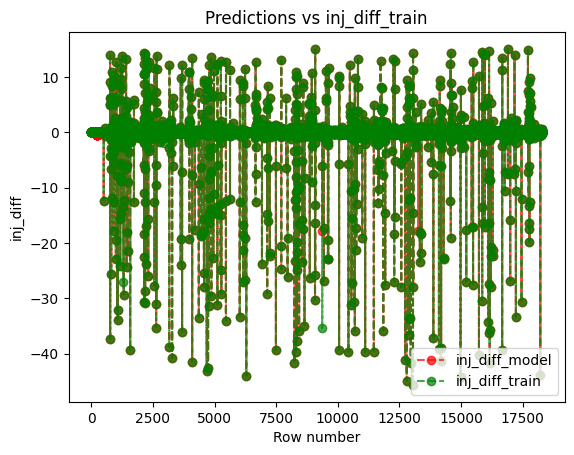

In [54]:
# plot between predictions and Y_test
x_axis = np.array(range(0, predictions_train_all_use[0].shape[0]))
plt.plot(x_axis, predictions_train_all_use[0], linestyle="--", marker="o", alpha=0.7, color='r', label="inj_diff_model")
plt.plot(x_axis, df[columnsTarget], linestyle="--", marker="o", alpha=0.7, color='g', label="inj_diff_train")
plt.xlabel('Row number')
plt.ylabel('inj_diff')
plt.title('Predictions vs inj_diff_train')
plt.legend(loc='lower right')
plt.savefig("Predictions vs inj_diff_train.png")


### submit data export

In [48]:
df_t['inj_diff_dt_split'] = predictions_test_all_use[0]
#correcting artifact endpoint
df_t['inj_diff_dt_split'][0]=0
df_t['inj_diff_dt_split'][-1]=-43.44
df_t['inj_diff_dt_split'].to_csv('inj_diff_dt_split_use.csv', index=False)

# 10-folder X-validation

In [37]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb

# user variables to tune
folds   = 10

metric  = "neg_mean_squared_error"
params = {
    'max_depth': 3,
    'learning_rate': 0.01,
    'n_estimators': 350
}
# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()
models["XgBoost"]       = xgb.XGBRegressor(**params)

In [38]:
#with entire training data
# 10-fold cross validation for each model
model_results = []
model_names   = []
predictions_test_xv = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds)
    results = cross_val_score(model, df[columnsFeat], df[columnsTarget], cv=k_fold, scoring=metric)
    model.fit(df[columnsFeat], df[columnsTarget])
    predictions_test = model.predict(df_t[columnsFeat])
    model_results.append(results)
    predictions_test_xv.append(predictions_test)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

Linear: -14.01, 3.53
Lasso: -14.452, 4.024
ElasticNet: -14.178, 3.827
KNN: -13.969, 3.895
DecisionTree: -22.273, 6.27
SVR: -14.705, 4.178
AdaBoost: -15.058, 6.071
GradientBoost: -12.167, 3.541
RandomForest: -12.439, 4.202
ExtraTrees: -12.196, 3.574
XgBoost: -12.503, 3.296


<function matplotlib.pyplot.show(close=None, block=None)>

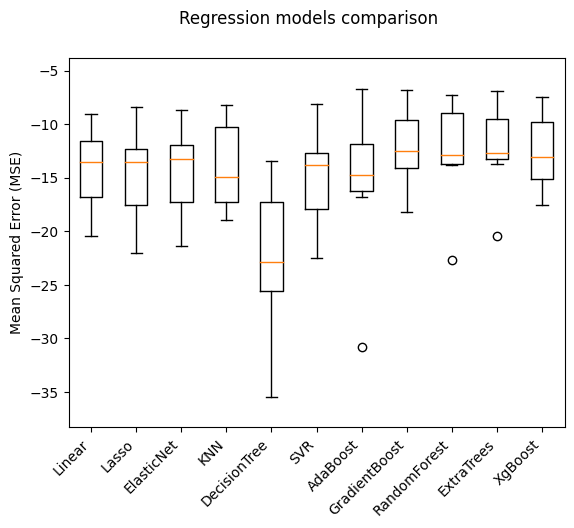

In [39]:
# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.show


1. Avg_CCS1_WHCO2InjTp_F  (0.167713)
2. Avg_PLT_CO2VentRate_TPH  (0.175683)
3. Avg_CCS1_WHCO2InjPs_psi  (0.259446)
4. ventRate_diff  (0.397157)


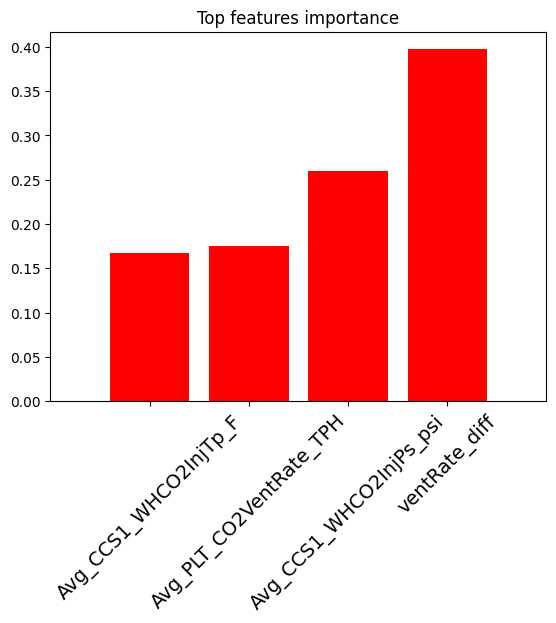

Mean Feature Importance 0.250000


In [80]:
# create and fit the best regression model
best_model = xgb.XGBRegressor(**params)
best_model.fit(df[columnsFeat], df[columnsTarget])

importances = best_model.feature_importances_
indices = np.argsort(importances)[::1]

for f in range(4):
    print("%d. %s  (%f)" % (f + 1, columnsFeat[indices[f]], importances[indices[f]] ))

indices=indices[:10]
plt.figure()
plt.title("Top features importance")
plt.bar(range(4), importances[indices], color="r", align="center")
plt.xticks(range(4),columnsFeat[indices], fontsize=14, rotation=45)
plt.xlim([-1,4])
plt.show()
print("Mean Feature Importance %.6f" %np.mean(importances))


1. Avg_PLT_CO2VentRate_TPH  (0.147662)
2. Avg_CCS1_WHCO2InjTp_F  (0.256404)
3. Avg_CCS1_WHCO2InjPs_psi  (0.291658)
4. ventRate_diff  (0.304276)


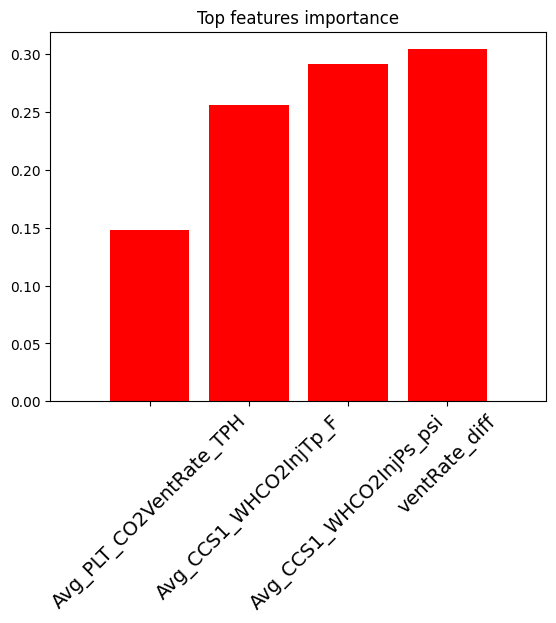

Mean Feature Importance 0.250000


In [81]:
# create and fit the best regression model
best_model2 = ExtraTreesRegressor()
best_model2.fit(df[columnsFeat], df[columnsTarget])

importances = best_model2.feature_importances_
indices = np.argsort(importances)[::1]

for f in range(4):
    print("%d. %s  (%f)" % (f + 1, columnsFeat[indices[f]], importances[indices[f]] ))

indices=indices[:10]
plt.figure()
plt.title("Top features importance")
plt.bar(range(4), importances[indices], color="r", align="center")
plt.xticks(range(4),columnsFeat[indices], fontsize=14, rotation=45)
plt.xlim([-1,4])
plt.show()
print("Mean Feature Importance %.6f" %np.mean(importances))


In [36]:
#Hyperparameter Tuning on Random States
random_states=[0,1,11,1000,12,23,29,34,35,41,45,500]
predictions_train=[]
predictions_test=[]
predictions_test_all_randomestate=[]
for random_state in random_states:
    model = DecisionTreeRegressor(random_state=random_state)
    model.fit(df[columnsFeat], df[columnsTarget])

    # Make predictions on the training, validation and test data.
    predictions_train = model.predict(df[columnsFeat])
    #predictions_valid = model.predict(xvalid[columnsFeat])
    predictions_test = model.predict(df_t[columnsFeat])

    # Append the predicted values to the list.
    predictions_test_all_randomestate.append(predictions_test)

    # Print root mean square error.
    mse_train = mean_squared_error(predictions_train, df[columnsTarget])
    
    print(model, "mse_train:", mse_train)

DecisionTreeRegressor(random_state=0) mse_train: 0.07284934891256592
DecisionTreeRegressor(random_state=1) mse_train: 0.07284934891256592
DecisionTreeRegressor(random_state=11) mse_train: 0.07284934891256592
DecisionTreeRegressor(random_state=1000) mse_train: 0.07284934891256592
DecisionTreeRegressor(random_state=12) mse_train: 0.07284934891256592
DecisionTreeRegressor(random_state=23) mse_train: 0.07284934891256592
DecisionTreeRegressor(random_state=29) mse_train: 0.07284934891256592
DecisionTreeRegressor(random_state=34) mse_train: 0.07284934891256592
DecisionTreeRegressor(random_state=35) mse_train: 0.07284934891256592
DecisionTreeRegressor(random_state=41) mse_train: 0.07284934891256592
DecisionTreeRegressor(random_state=45) mse_train: 0.07284934891256592
DecisionTreeRegressor(random_state=500) mse_train: 0.07284934891256592


In [80]:
# Stats packages
import statsmodels.api as sm
from statsmodels.api import OLS, add_constant
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima.arima import auto_arima
from pmdarima import model_selection
from pmdarima.arima import auto_arima
from pmdarima import model_selection
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.tools import diff
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm


**EDA: Seasonal decomposition**

Decompose the time series into trend, seasonality and the reminder (residual), which is the model can not account for.

In [81]:
ts=df['inj_diff']

We can see that the p-value is 0 the time series is stationary.  


c:\users\hxue3\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


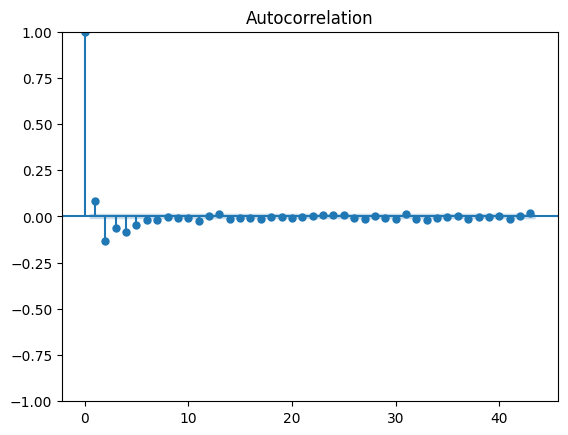

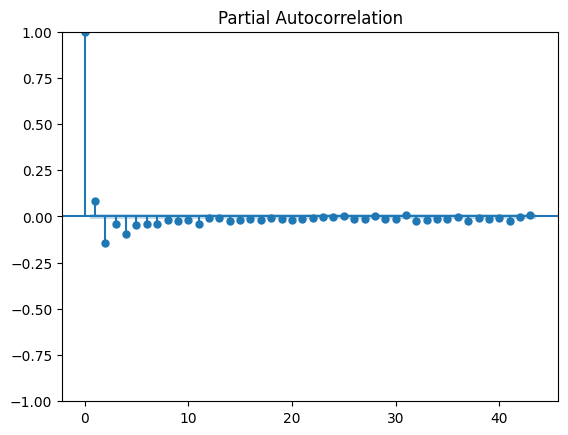

In [82]:
acf = plot_acf(ts)
pacf = plot_pacf(ts)

**Exponential Smoothing (Triple Exponential Smoothing) Model** - smoothed series is a simple weighted average of the past and the present

In [83]:
fit2 = ExponentialSmoothing(df['inj_diff'], seasonal_periods = 24, trend = 'add', seasonal = 'add', 
                            use_boxcox=False)
fit2 = fit2.fit()

c:\users\hxue3\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [84]:
fit2.params_formatted
forecast_object2 = fit2.forecast(steps=201)

predicted_ratedelta_HW = forecast_object2.values

# print the predicted values
print(predicted_ratedelta_HW)


[-0.10498917 -0.12177649 -0.29192177 -0.19722131 -0.16262608  0.27539601
  0.20270132  0.03335966 -0.08640611  0.21428702  0.14729468  0.15988771
  0.14471605  0.00415108  0.06783744  0.03265648  0.28242847  0.03764198
 -0.05868083 -0.1740728   0.0956155   0.14588282  0.08910867 -0.24325007
 -0.10496173 -0.12174905 -0.29189433 -0.19719388 -0.16259864  0.27542345
  0.20272876  0.0333871  -0.08637867  0.21431446  0.14732212  0.15991515
  0.14474349  0.00417852  0.06786488  0.03268392  0.28245591  0.03766942
 -0.05865339 -0.17404537  0.09564293  0.14591025  0.08913611 -0.24322264
 -0.10493429 -0.12172162 -0.2918669  -0.19716644 -0.1625712   0.27545089
  0.2027562   0.03341454 -0.08635123  0.2143419   0.14734956  0.15994259
  0.14477092  0.00420596  0.06789232  0.03271135  0.28248335  0.03769685
 -0.05862595 -0.17401793  0.09567037  0.14593769  0.08916355 -0.2431952
 -0.10490686 -0.12169418 -0.29183946 -0.197139   -0.16254376  0.27547832
  0.20278363  0.03344198 -0.0863238   0.21436934  0.

c:\users\hxue3\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
